# Predictive Analytics for Student Success(Model)

## Working with Classification Trees in Python

### Learning Objectives
Decision Trees are one of the most popular approaches to supervised machine learning. Decison Trees use an inverted tree-like structure to model the relationship between independent variables and a dependent variable. A tree with a categorical dependent variable is known as a **Classification Tree**. By the end of this tutorial, you will have learned:

+ How to import, explore and prepare data
+ How to build a Classification Tree model
+ How to visualize the structure of a Classification Tree
+ How to Prune a Classification Tree 

## Table of Contents
<ul>
<li><a href="#Introduction">Introduction</a></li>
<li><a href="#Data_Wrangling">Data Wrangling</a></li>
<li><a href="#Exploratory_Data_Analysis">Exploratory Data Analysis</a></li>
<li><a href="#Model">Model</a></li>
<li><a href="#Conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<span style="font-family:Impact; color: orange;">This is summary about the students dataset an some information about the data and key attribute:
</span>
### About dataset
1. **Student_ID**
2. **GPA:(Grade Point Average)**
3. **Academic_Performance_Score**
4. **Attendance_Rate**
5. **Study_Hours_Per_Week**
6. **Participation_Category**
7. **Project_Scores**
8. **Participation_Score**
9. **Test_Score_Average**
10. **Homework_Completion_Rate**
11. **At_Risk**

<span style="font-family:Impact; color: green;">an Summary of Predictive Analytics for Student Success Project:
</span>

**This project aims to apply artificial intelligence and machine learning techniques to analyze student data and predict academic outcomes. By using a classification tree algorithm, the model identifies students who are at risk of dropping out or underperforming. This early identification allows for timely and targeted interventions. The project is crucial in the educational sector as it helps institutions proactively support students, thereby enhancing their chances of academic success and improving overall educational outcomes...**

# Data_Wrangling

## 1. Collect the Data

In [12]:
import pandas as pd
df=pd.read_excel(r"C:\Users\ahmed\Desktop\InternShip-Ahmed-Diefalaa-Project\1th Project\students_data - Cllened.xlsx")
df.head()

,Student_ID,GPA,Academic_Performance_Score,Study_Hours_Per_Week,Attendance_Rate,Project_Score (0-100),Test_Score_Average (0-100),Participation_Score (0-100),Participation_Category,Homework_Completion_Rate (%),At_Risk
0,1,3.0,75,10,85,80,70,65,Medium,90,No
1,2,3.5,88,12,92,85,80,75,Medium,95,No
2,3,2.5,60,8,70,65,55,60,Medium,85,Yes
3,4,2.0,50,6,60,50,45,50,Low,75,Yes
4,5,3.8,90,15,95,95,85,80,High,98,No


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 11 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Student_ID                    40 non-null     int64  
 1   GPA                           40 non-null     float64
 2   Academic_Performance_Score    40 non-null     int64  
 3   Study_Hours_Per_Week          40 non-null     int64  
 4   Attendance_Rate               40 non-null     int64  
 5   Project_Score (0-100)         40 non-null     int64  
 6   Test_Score_Average (0-100)    40 non-null     int64  
 7   Participation_Score (0-100)   40 non-null     int64  
 8   Participation_Category        40 non-null     object 
 9   Homework_Completion_Rate (%)  40 non-null     int64  
 10  At_Risk                       40 non-null     object 
dtypes: float64(1), int64(8), object(2)
memory usage: 3.6+ KB


In [14]:
df.isnull().sum()

Student_ID                      0
GPA                             0
Academic_Performance_Score      0
Study_Hours_Per_Week            0
Attendance_Rate                 0
Project_Score (0-100)           0
Test_Score_Average (0-100)      0
Participation_Score (0-100)     0
Participation_Category          0
Homework_Completion_Rate (%)    0
At_Risk                         0
dtype: int64

In [15]:
df.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

### Data_formating

In [16]:
# df_subset = df[["Participation", "Socioeconomic_Status"]]
# print(df_subset.head())

In [17]:
# import pandas as pd
# from sklearn.preprocessing import LabelEncoder

In [18]:
# df2 = pd.DataFrame(df_subset)

# le_participation = LabelEncoder()
# le_socioeconomic = LabelEncoder()

# df2["Participation"] = le_participation.fit_transform(df2["Participation"])
# df2["Socioeconomic_Status"] = le_socioeconomic.fit_transform(df2["Socioeconomic_Status"])

# print(df2.head())

# Exploratory_Data_Analysis

## 2. Explore the Data

In [19]:
df.describe()

,Student_ID,GPA,Academic_Performance_Score,Study_Hours_Per_Week,Attendance_Rate,Project_Score (0-100),Test_Score_Average (0-100),Participation_Score (0-100),Homework_Completion_Rate (%)
count,40.000000,40.000000,40.00000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,20.500000,2.797500,65.85000,9.100000,74.700000,69.175000,63.025000,63.150000,82.000000
std,11.690452,0.577123,14.44095,3.019594,12.430731,14.633799,14.888453,10.072939,7.964666
min,1.000000,1.800000,40.00000,5.000000,54.000000,45.000000,35.000000,50.000000,65.000000
25%,10.750000,2.300000,55.00000,7.000000,63.750000,55.000000,50.000000,55.000000,75.000000
50%,20.500000,2.750000,65.50000,8.000000,74.500000,67.500000,60.000000,60.000000,81.000000
75%,30.250000,3.225000,77.25000,11.250000,85.250000,81.250000,76.250000,70.000000,88.500000
max,40.000000,3.900000,91.00000,16.000000,95.000000,95.000000,90.000000,85.000000,98.000000


In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

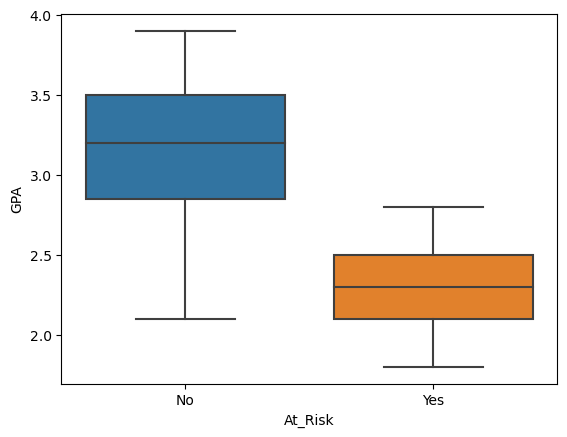

In [21]:
ax = sns.boxplot(data = df, x = 'At_Risk', y = 'GPA')

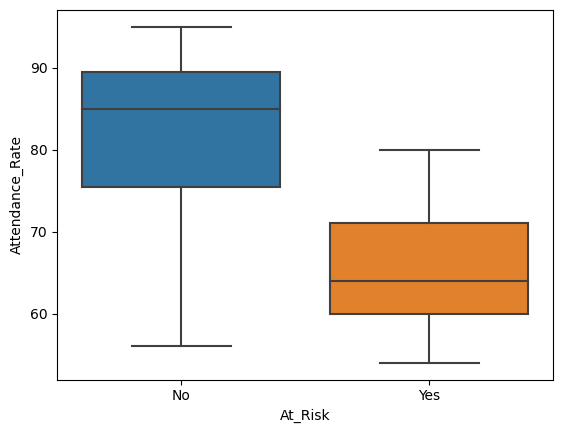

In [22]:
ax=sns.boxplot(data= df, x = 'At_Risk', y = 'Attendance_Rate')

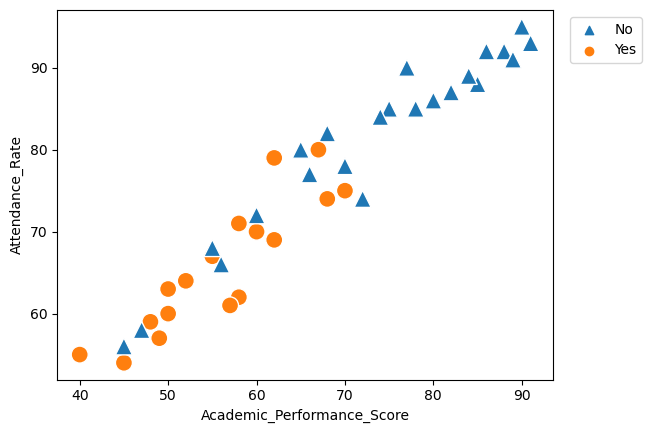

In [23]:
ax = sns.scatterplot(data = df, 
                     x = 'Academic_Performance_Score', 
                     y = 'Attendance_Rate', 
                     hue = 'At_Risk', 
                     style = 'At_Risk', 
                     markers = ['^','o'], 
                     s = 150)
ax = plt.legend(bbox_to_anchor = (1.02, 1), loc = 'upper left')

# Model

## 3. Prepare the Data

In [24]:
y=df[['At_Risk']]

In [25]:
X=df[['Academic_Performance_Score','Attendance_Rate']]

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    train_size = 0.8,
                                                    stratify = y,
                                                    random_state = 1234) 

In [27]:
X_train.shape, X_test.shape

((32, 2), (8, 2))

## 4. Train and Evaluate the Classification Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier(random_state = 1234)

In [29]:
model=classifier.fit(X_train,y_train)

In [30]:
model.score(X_test,y_test)

0.5

## 5. Visualize the Classification Tree

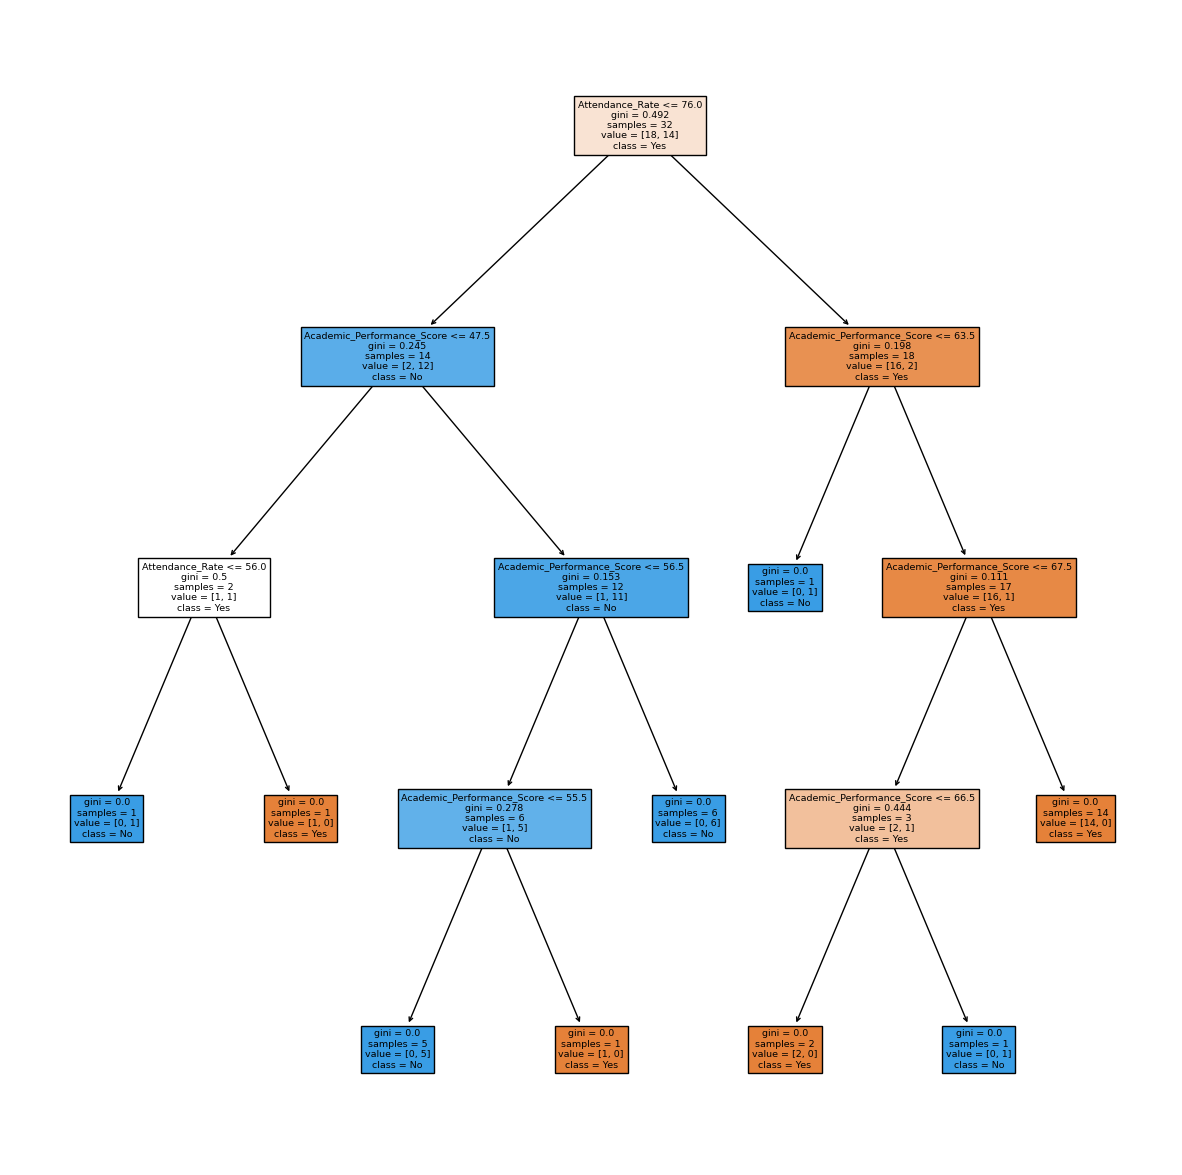

In [31]:
from sklearn import tree
plt.figure(figsize = (15,15))
tree.plot_tree(model,
               feature_names=list(X.columns),
               class_names=['Yes','No'],
               filled=True);

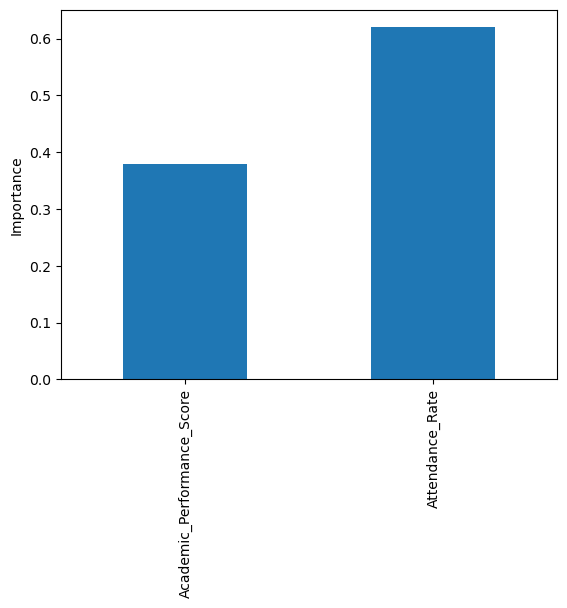

In [32]:
importance = model.feature_importances_
feature_importance = pd.Series(importance, index = X.columns)
feature_importance.plot(kind = 'bar')
plt.ylabel('Importance');

## 6. Prune the Classification Tree

In [33]:
model.score(X_train, y_train)

1.0

In [34]:
model.score(X_test, y_test)

0.5

In [35]:
grid = {'max_depth': [2, 3, 4, 5],
         'min_samples_split': [2, 3, 4],
         'min_samples_leaf': range(1, 7)}

In [36]:
from sklearn.model_selection import GridSearchCV
classifier = DecisionTreeClassifier(random_state = 1234)
gcv = GridSearchCV(estimator = classifier, param_grid = grid)
gcv.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1234),
             param_grid={'max_depth': [2, 3, 4, 5],
                         'min_samples_leaf': range(1, 7),
                         'min_samples_split': [2, 3, 4]})

In [37]:
model_ = gcv.best_estimator_
model_.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2, min_samples_leaf=3, random_state=1234)

In [38]:
model_.score(X_train, y_train)

0.875

In [39]:
model_.score(X_test, y_test)

0.5

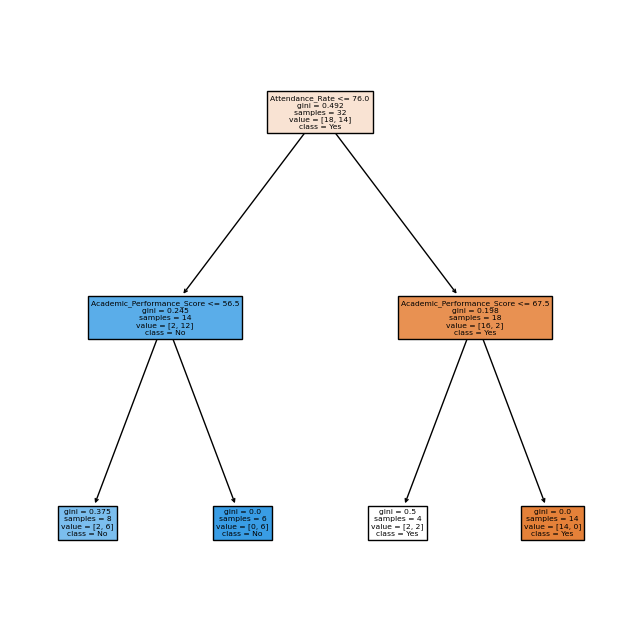

In [40]:
plt.figure(figsize = (8,8))
tree.plot_tree(model_, 
                   feature_names = list(X.columns), 
                   class_names = ['Yes','No'],
                   filled = True);

# 7.END

# Student Performance Evaluation Interface

This interactive interface helps evaluate student performance based on several criteria, such as GPA, academic scores, study hours, attendance rates, and more. Enter the required information to receive an evaluation result.

### Link For Interface page - open from (bc)
file:/
<span style="font-family:Impact; color: green;">file:///C:/Users/ahmed/Desktop/InternShip-Ahmed-Diefalaa-Project/Evaluate(stu_data)/HTML.html
</span>

## open from - google drive
## Google Drive
#### link interface:

https://drive.google.com/file/d/1CG_nBwT7NQMPQvKhjuYtioyxYMSdD4ej/view?usp=sharing

open thie link an dowinlowd the html file an open the html file an enter your data an evaluat the data.

# Conclusions

**The Predictive Analytics for Student Success project demonstrates the significant potential of artificial intelligence and machine learning in the educational sector. By leveraging a classification tree algorithm to analyze student data, the project effectively identifies those at risk of academic failure or dropout. This proactive approach enables educational institutions to implement timely interventions, support at-risk students, and ultimately improve overall student performance and retention rates. The success of this project highlights the value of data-driven decision-making in education and sets a precedent for future efforts to harness technology for enhancing student success and educational outcomes.**